In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [387]:
SVM = pickle.load(open('Pickle/SVM.pkl', 'rb'))
KNN = pickle.load(open('Pickle/KNN.pkl', 'rb'))
RF = pickle.load(open('Pickle/RF.pkl', 'rb'))

In [388]:
def Fine_Tune_Result(param, estimator, n_rank, p_rank):
    temp = np.array([estimator.cv_results_[i] for i in param]).T
    col = [i.replace("param_","")  for i in param]
    return pd.DataFrame(data=temp.tolist(),columns=col).sort_values(p_rank).set_index(p_rank).head(n_rank)

# 1/ SVM Grid Search

In [389]:
SVM_Grid = pickle.load(open('Pickle/svm_grid.pkl','rb'))

In [390]:
SVM_Grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [391]:
svm_param = ['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'mean_fit_time','rank_test_score', 'params']

In [393]:
svm = Fine_Tune_Result(svm_param, SVM_Grid, n_rank=10, p_rank="rank_test_score")

In [394]:
svm

,C,gamma,kernel,mean_test_score,mean_fit_time,params
rank_test_score,,,,,,
1,1.0,scale,rbf,0.842914,92.518830,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,0.5,scale,rbf,0.838785,102.922522,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}"
3,0.1,auto,linear,0.838556,95.227571,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}"
3,0.1,scale,linear,0.838556,93.948485,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
5,0.5,scale,linear,0.836399,102.898599,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}"
5,0.5,auto,linear,0.836399,95.820798,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}"
7,1.0,scale,linear,0.836399,103.888298,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
7,1.0,auto,linear,0.836399,104.033929,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
9,0.1,scale,rbf,0.827774,111.137270,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}"


# 2/ KNN Grid Search

In [395]:
KNN_Grid = pickle.load(open('Pickle/knn_grid.pkl','rb'))

In [396]:
KNN_Grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [397]:
knn_param = ['param_n_neighbors', 'param_weights', 'rank_test_score', 'mean_test_score', 'mean_fit_time', 'params']

In [399]:
knn = Fine_Tune_Result(knn_param, KNN_Grid, n_rank=10, p_rank="rank_test_score")

In [400]:
knn

,n_neighbors,weights,mean_test_score,mean_fit_time,params
rank_test_score,,,,,
1,7,distance,0.821260,1.560538,"{'n_neighbors': 7, 'weights': 'distance'}"
2,7,uniform,0.820480,1.606490,"{'n_neighbors': 7, 'weights': 'uniform'}"
3,6,uniform,0.820021,1.538503,"{'n_neighbors': 6, 'weights': 'uniform'}"
4,6,distance,0.818415,1.553828,"{'n_neighbors': 6, 'weights': 'distance'}"
5,5,distance,0.817268,1.523509,"{'n_neighbors': 5, 'weights': 'distance'}"
6,5,uniform,0.817177,1.521205,"{'n_neighbors': 5, 'weights': 'uniform'}"
7,4,uniform,0.813782,1.505421,"{'n_neighbors': 4, 'weights': 'uniform'}"
8,4,distance,0.809928,1.528562,"{'n_neighbors': 4, 'weights': 'distance'}"
9,3,distance,0.807680,1.540375,"{'n_neighbors': 3, 'weights': 'distance'}"


# 3/ Random Forest Random Search

In [401]:
RF_random = pickle.load(open('Pickle/rf_random.pkl', 'rb'))

In [402]:
rf_param = ['param_n_estimators','param_min_samples_split','param_min_samples_leaf','param_max_features','param_max_depth','param_bootstrap','mean_test_score','rank_test_score','mean_fit_time', 'params']

In [403]:
RF_random.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_max_depth', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [404]:
rf = Fine_Tune_Result(rf_param, RF_random, n_rank=10, p_rank= "rank_test_score")

In [405]:
rf

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap,mean_test_score,mean_fit_time,params
rank_test_score,,,,,,,,,
1,1000,2,1,auto,50.0,False,0.848832,120.037817,"{'n_estimators': 1000, 'min_samples_split': 2,..."
2,1600,2,1,sqrt,100.0,False,0.848052,192.431580,"{'n_estimators': 1600, 'min_samples_split': 2,..."
3,2000,10,2,auto,40.0,False,0.842272,200.534232,"{'n_estimators': 2000, 'min_samples_split': 10..."
4,400,2,2,auto,70.0,True,0.841171,25.686526,"{'n_estimators': 400, 'min_samples_split': 2, ..."
5,600,10,2,sqrt,60.0,True,0.840345,37.121924,"{'n_estimators': 600, 'min_samples_split': 10,..."
6,2000,5,4,auto,NaN,False,0.836812,200.258193,"{'n_estimators': 2000, 'min_samples_split': 5,..."
7,200,5,4,sqrt,NaN,False,0.836720,20.595693,"{'n_estimators': 200, 'min_samples_split': 5, ..."
8,1000,10,4,sqrt,70.0,True,0.833601,58.807126,"{'n_estimators': 1000, 'min_samples_split': 10..."
9,1200,2,2,auto,20.0,True,0.827361,65.946714,"{'n_estimators': 1200, 'min_samples_split': 2,..."


# 4/ Visualization

In [406]:
_rf = rf.head(5)
_svm = svm.head(5)
_knn = knn.head(5)

In [407]:
bars1 = [item for item in _svm["mean_test_score"].values]
bars2 = [item for item in _knn["mean_test_score"].values] 
bars3 = [item for item in _rf["mean_test_score"].values]

In [408]:
labels = []
for i in range(5):
    labels.append(_svm["params"].values[i])
    labels.append(_knn["params"].values[i])    
    labels.append(_rf["params"].values[i])    

In [409]:
len(labels)

15

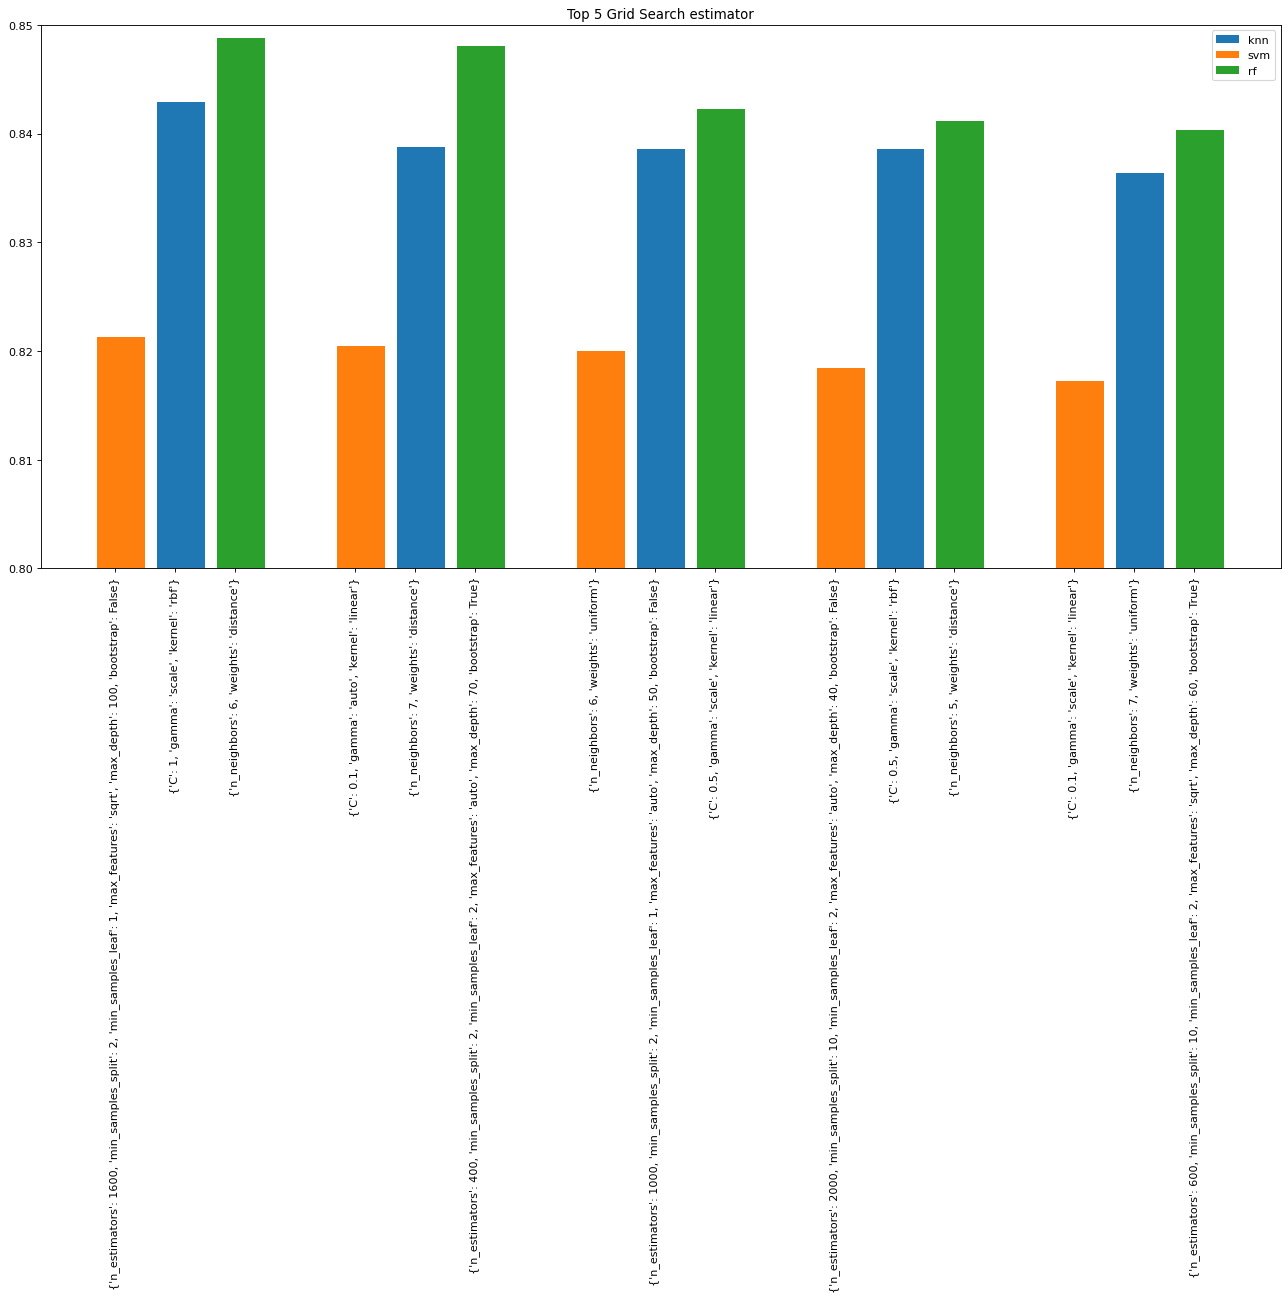

In [411]:
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.ylim([0.8, 0.85])
barWidth = 0.9

r1 = [i for i in range(1, 21, 4)]
r2 = [i for i in range(0, 20, 4)]
r3 = [i for i in range(2, 22, 4)]

plt.bar(r1, bars1, label="knn")
plt.bar(r2, bars2, label="svm")
plt.bar(r3, bars3, label="rf")
s = r1 + r2 + r3 
plt.xticks([r + barWidth -1 for r in s], labels, rotation=90)
plt.legend()
plt.title("Top 5 Grid Search estimator")
plt.show()

# Update

In [543]:
def plot_result(x, r, esti):
    figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
    y_min_lim, y_max_lim = esti[x].min()-(esti[x].max()-esti[x].min()), esti[x].max()+ (esti[x].max()-esti[x].min())
    plt.ylim([y_min_lim, y_max_lim])
    if y_min_lim<0:
        y_min_lim = 0
    plt.ylim()
    for i in range(r):
        plt.bar(i, esti[x].iloc[i], label=esti["params"].iloc[i])
    plt.legend()
    plt.title("Top 5 Grid Search")
    plt.show()

# Score

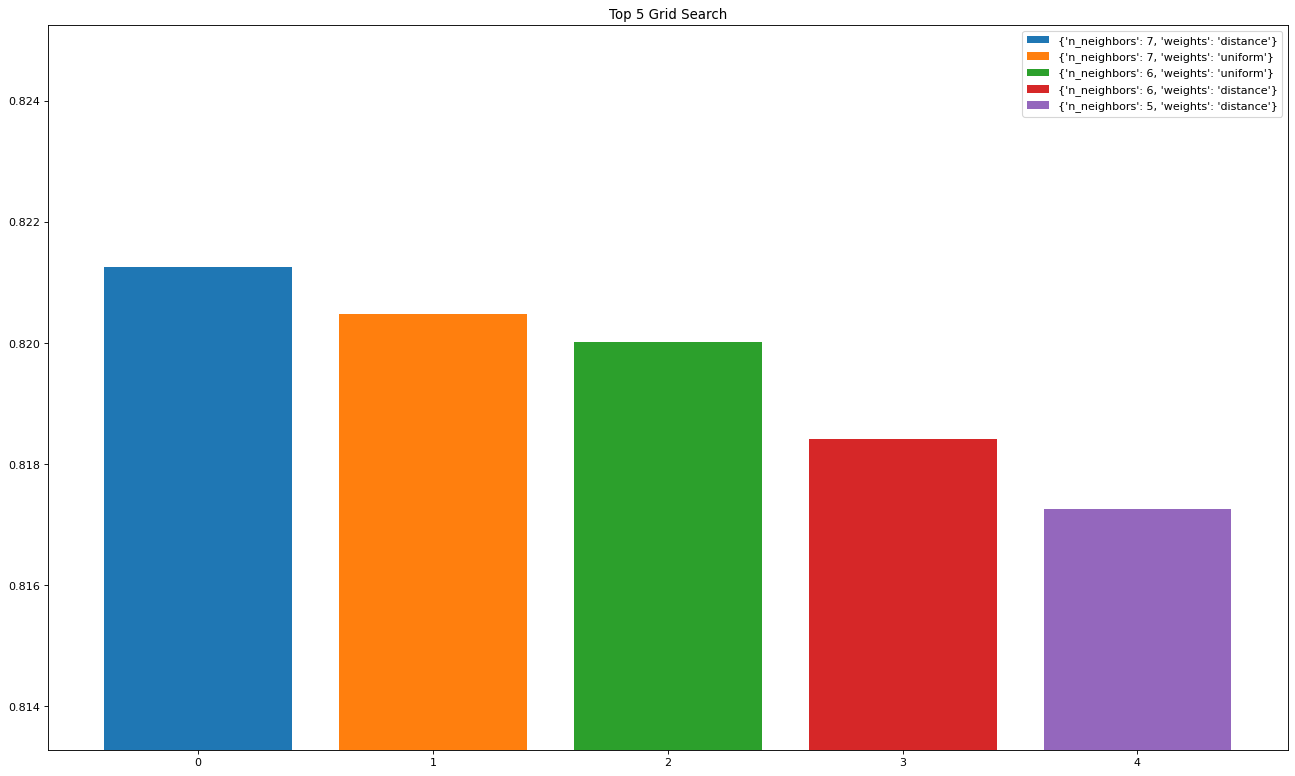

In [544]:
plot_result(x="mean_test_score", r=5, esti=_knn)

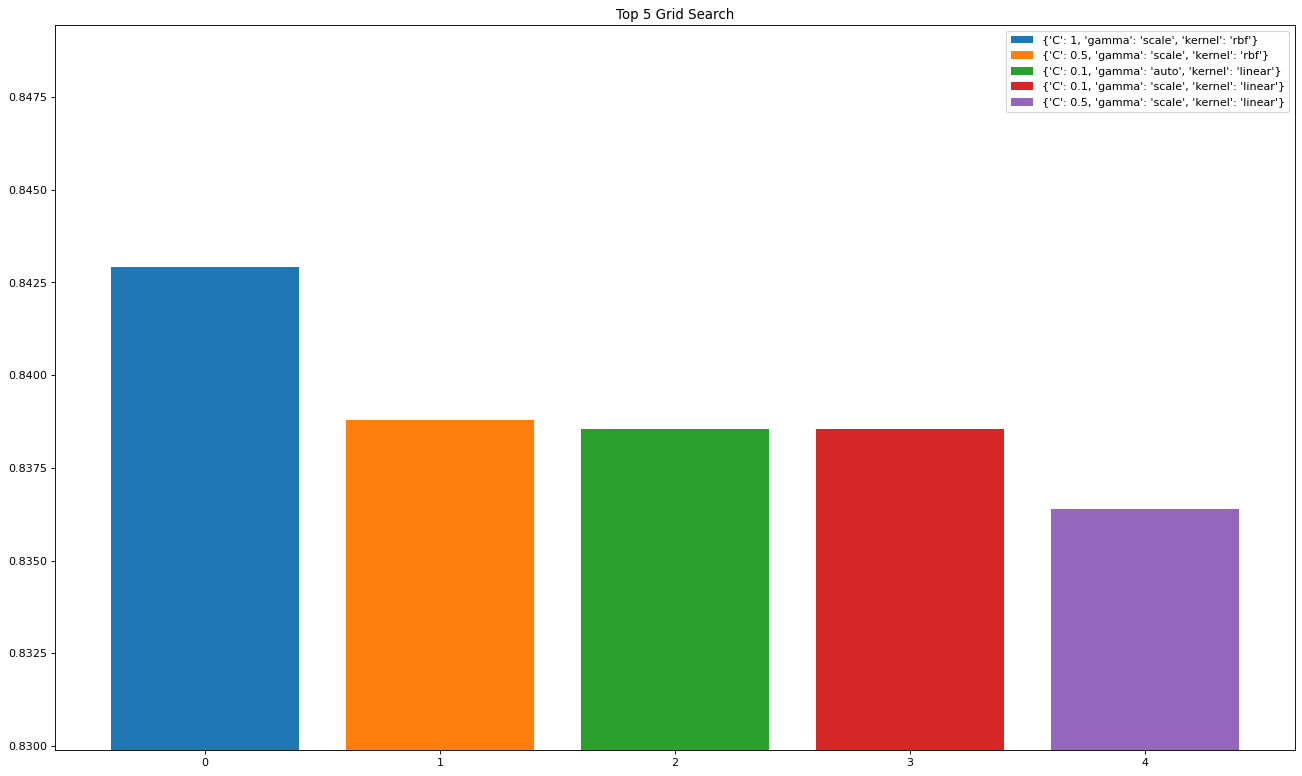

In [545]:
plot_result(x="mean_test_score", r=5, esti=_svm)

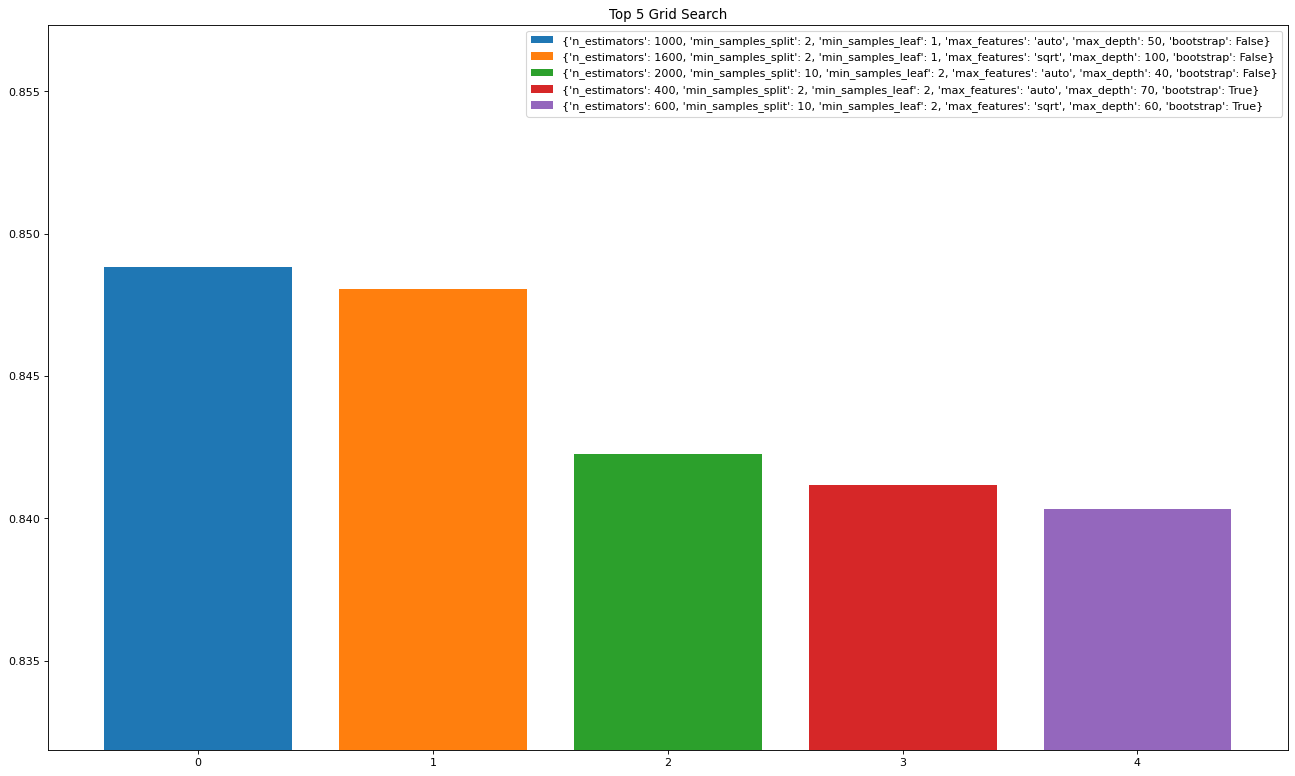

In [546]:
plot_result(x="mean_test_score", r=5, esti=_rf)

In [542]:
mean_knn, mean_svm, mean_rf = _knn["mean_test_score"].mean(), _svm["mean_test_score"].mean(), _rf["mean_test_score"].mean()
bars1 = [item for item in _knn["mean_test_score"].values]
bars2 = [item for item in _svm["mean_test_score"].values] 
bars3 = [item for item in _rf["mean_test_score"].values]

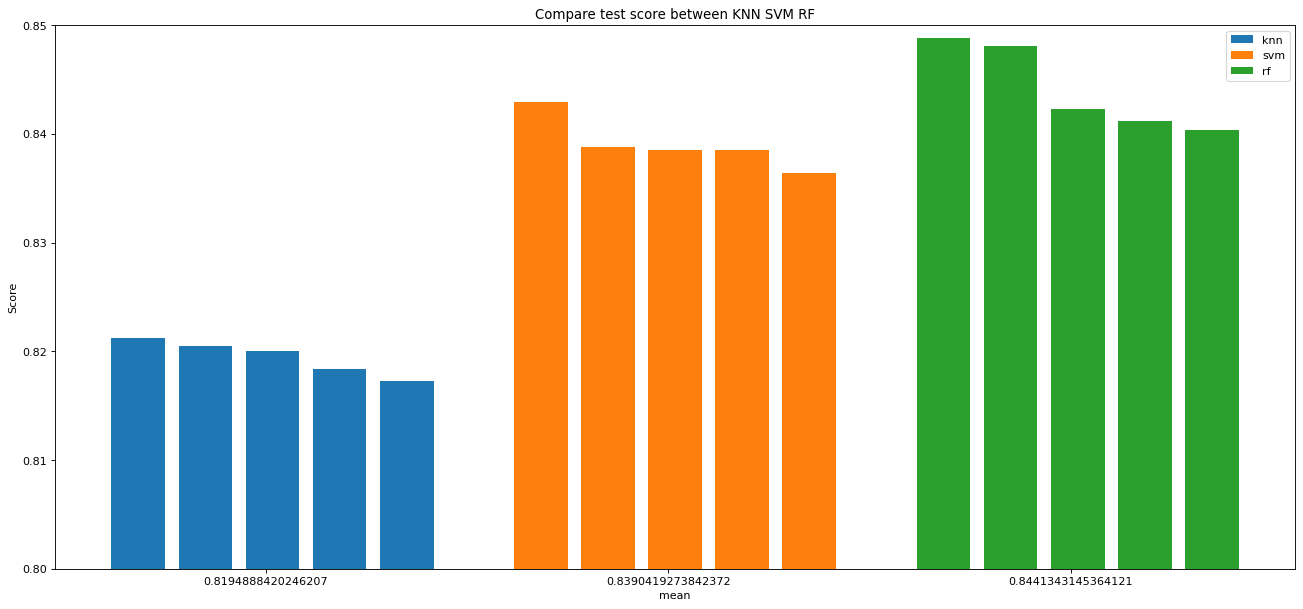

In [534]:
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.ylim([0.8, 0.85])
plt.bar(range(5), bars1, label="knn")
plt.bar(range(6,11), bars2, label="svm")
plt.bar(range(12, 17), bars3, label="rf")
plt.xticks([r + barWidth -2 for r in [3, 9, 15]], [mean_knn, mean_svm, mean_rf])
plt.ylabel("Score")
plt.xlabel("mean")
plt.title("Compare test score between KNN SVM RF")
plt.legend()
plt.show()

# Time

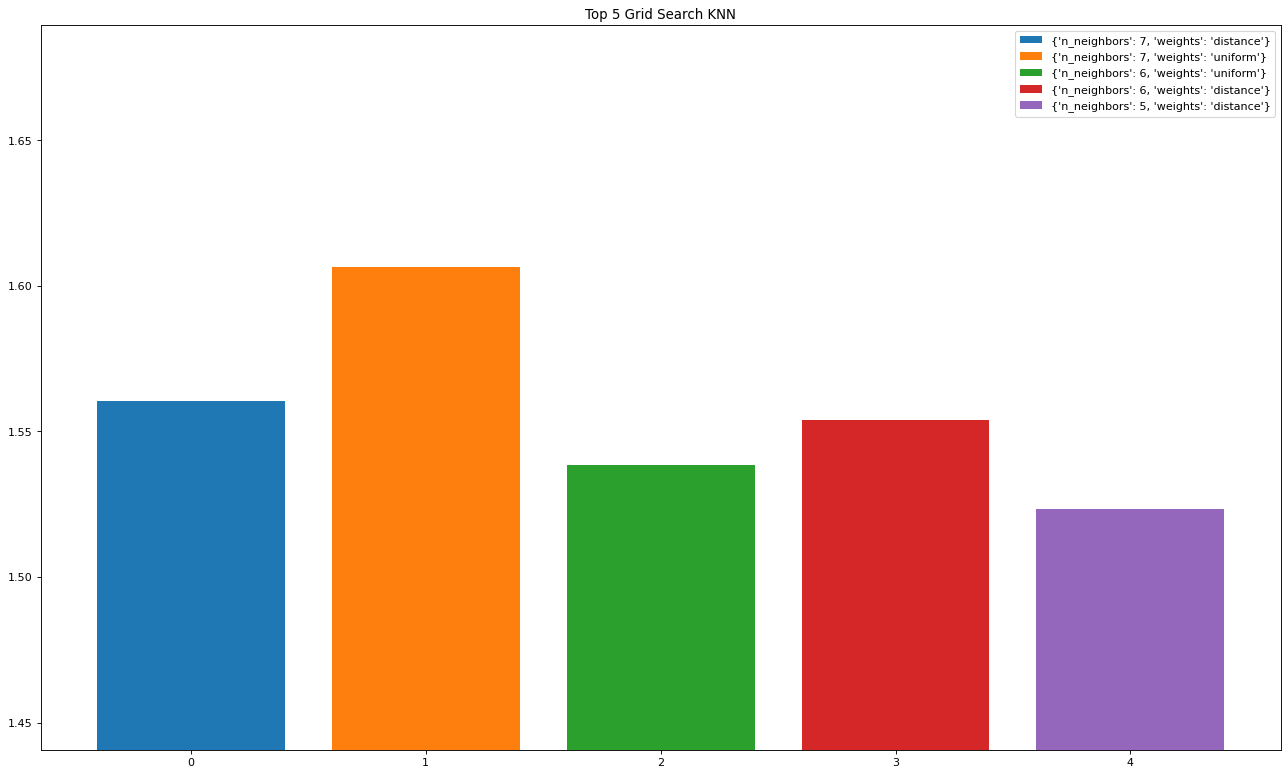

In [482]:
plot_result(x="mean_fit_time", r=5, esti=_knn)

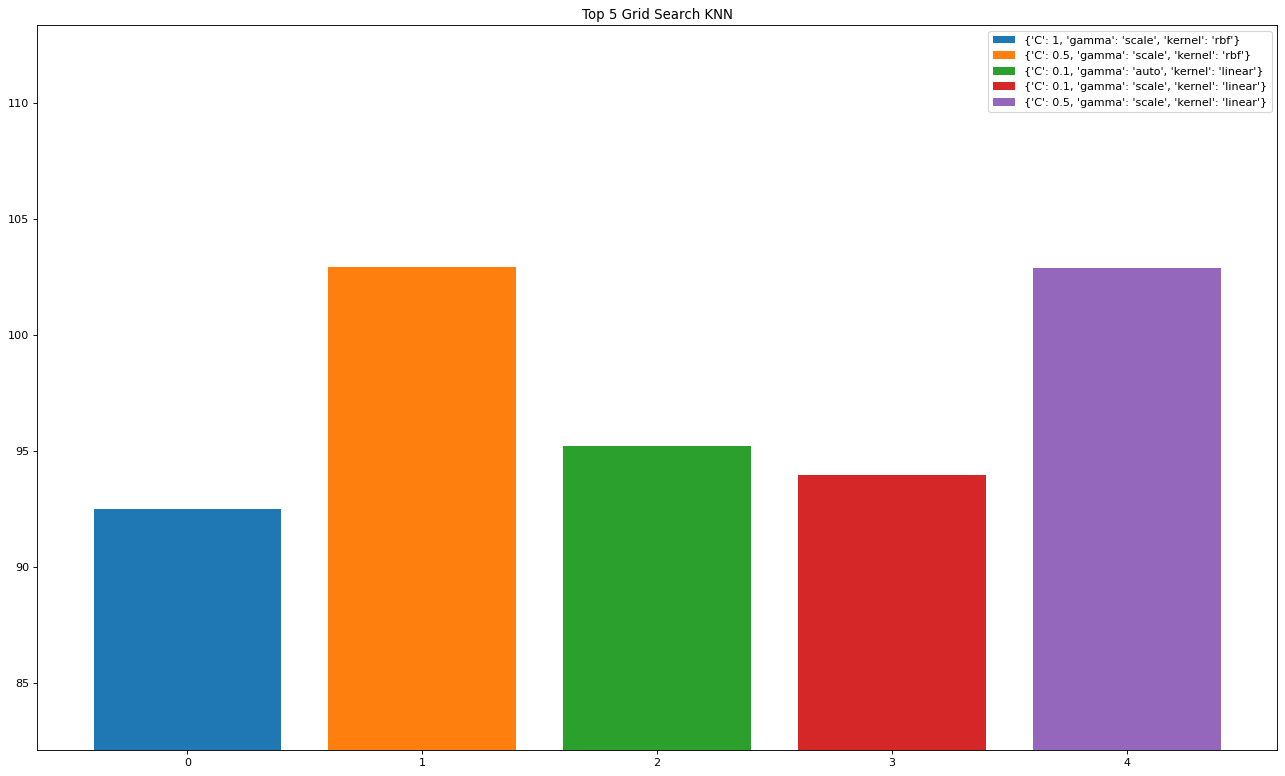

In [487]:
plot_result(x="mean_fit_time", r=5, esti=_svm)

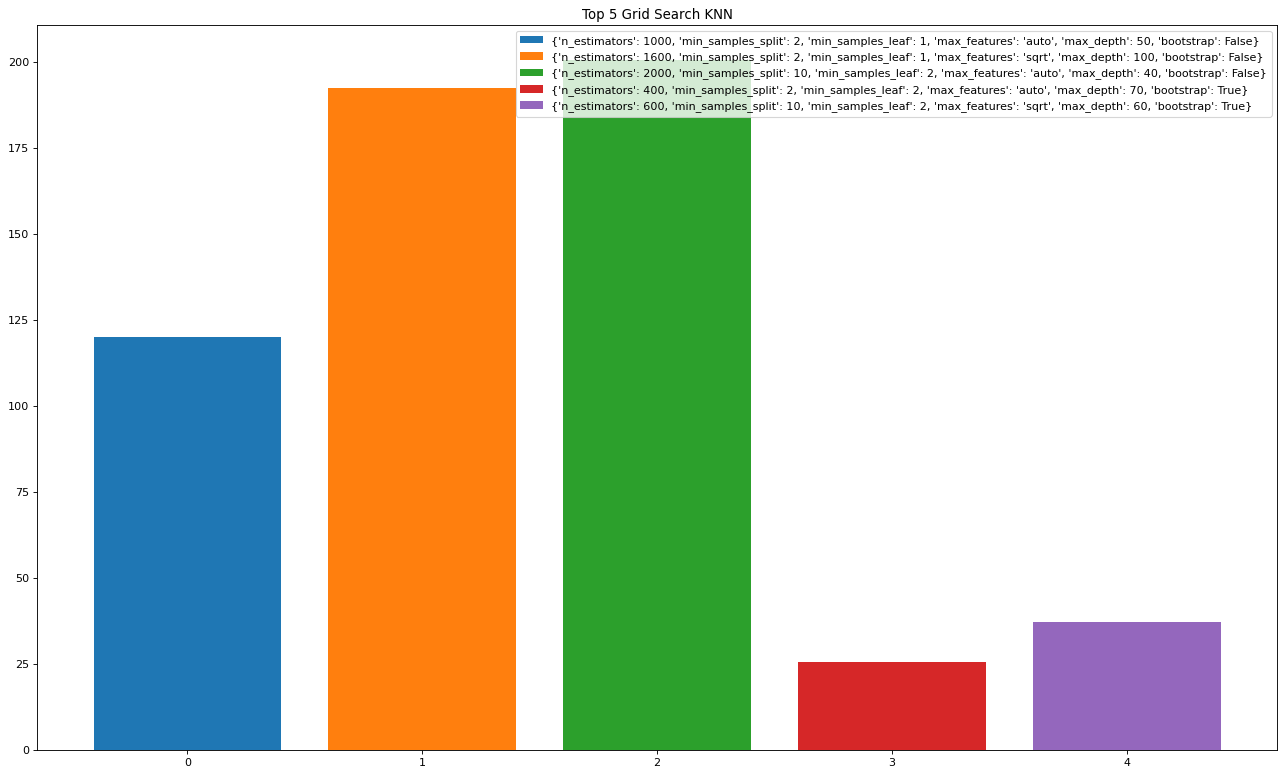

In [499]:
plot_result(x="mean_fit_time", r=5, esti=_rf)

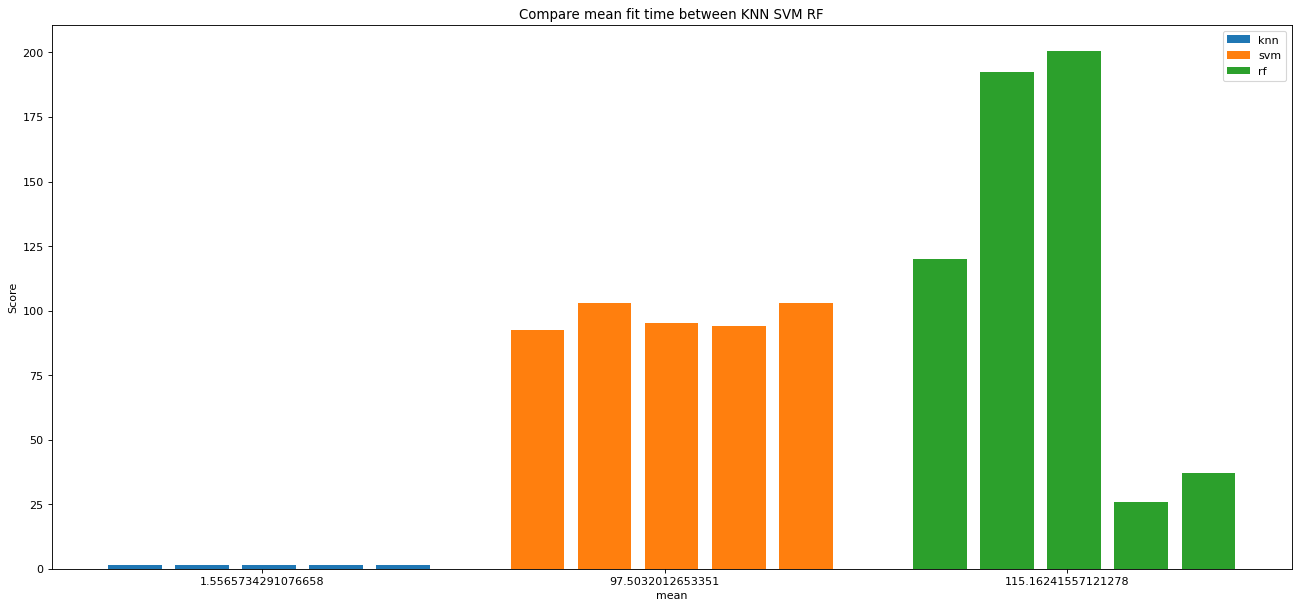

In [537]:
mean_knn, mean_svm, mean_rf = _knn["mean_fit_time"].mean(), _svm["mean_fit_time"].mean(), _rf["mean_fit_time"].mean()
bars1 = [item for item in _knn["mean_fit_time"].values]
bars2 = [item for item in _svm["mean_fit_time"].values] 
bars3 = [item for item in _rf["mean_fit_time"].values]

figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
# plt.ylim([0.8, 0.85])
plt.bar(range(5), bars1, label="knn")
plt.bar(range(6,11), bars2, label="svm")
plt.bar(range(12, 17), bars3, label="rf")
plt.xticks([r + barWidth -2 for r in [3, 9, 15]], [mean_knn, mean_svm, mean_rf])
plt.ylabel("Score")
plt.xlabel("mean")
plt.title("Compare mean fit time between KNN SVM RF")
plt.legend()
plt.show()